In [145]:
# Librerías esenciales
import pandas as pd
import numpy as np

# Preprocesamiento y modelado
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos
sns.set(style="whitegrid")
# Cargar el conjunto de datos
path = r"C:\Users\primo\Desktop\Ciencia de Datos\Proyectos\BCRA\data\processed\consolidado.csv"
df = pd.read_csv(path, parse_dates=["fecha"])
df.set_index("fecha", inplace=True)
df = df.dropna(subset=["inflacion"]).copy()

In [146]:
# Definir variables predictoras (X) y variable objetivo (y)
features = ["inflacion", "base_monetaria", "cer", "tasa_depositos_30_dias"]
X = df[features].copy()
y = df["usd_oficial"].copy()

# Verificar las primeras filas
X.head(), y.head()

(            inflacion  base_monetaria       cer  tasa_depositos_30_dias
 fecha                                                                  
 2010-06-30        0.7   126897.238095  2.503820                9.041905
 2010-07-31        0.8   133899.190476  2.522423                9.187143
 2010-08-31        0.7   135670.952381  2.541500                9.271429
 2010-09-30        0.7   137986.136364  2.561350                9.437727
 2010-10-31        0.8   142075.105263  2.580184                9.326842,
 fecha
 2010-06-30    3.927143
 2010-07-31    3.934286
 2010-08-31    3.936190
 2010-09-30    3.952727
 2010-10-31    3.958421
 Name: usd_oficial, dtype: float64)

In [147]:
# Definir tamaño del conjunto de entrenamiento (80%)
train_size = int(len(X) * 0.8)

# Dividir manteniendo orden y el índice de fecha
X_train = X.iloc[:train_size]
X_test = X.iloc[train_size:]
y_train = y.iloc[:train_size]
y_test = y.iloc[train_size:]

# Verificar dimensiones
print(f"Dimensiones X_train: {X_train.shape}")
print(f"Dimensiones X_test: {X_test.shape}")


Dimensiones X_train: (132, 4)
Dimensiones X_test: (33, 4)


In [148]:
# Verificar si hay valores nulos en X_train o y_train
print("Valores nulos en X_train:")
print(X_train.isnull().sum())

print("\nValores nulos en y_train:")
print(y_train.isnull().sum())

Valores nulos en X_train:
inflacion                 0
base_monetaria            0
cer                       0
tasa_depositos_30_dias    0
dtype: int64

Valores nulos en y_train:
0


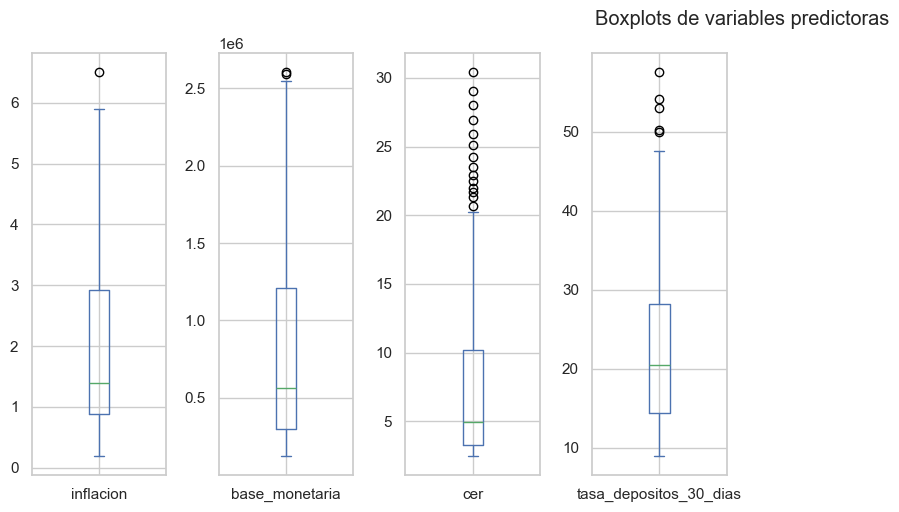

In [149]:
# Boxplots para detectar outliers en las variables predictoras
import matplotlib.pyplot as plt

X_train.plot(kind='box', subplots=True, layout=(1, 8), figsize=(15, 5), sharey=False)
plt.tight_layout()
plt.suptitle("Boxplots de variables predictoras", y=1.02)
plt.show()

In [150]:
print("Estadísticas de X_train:")
display(X_train.describe())

# Estadísticas descriptivas de la variable objetivo
print("\nEstadísticas de y_train:")
display(y_train.describe())

Estadísticas de X_train:


,inflacion,base_monetaria,cer,tasa_depositos_30_dias
count,132.000000,1.320000e+02,132.000000,132.000000
mean,1.961364,8.161658e+05,8.326354,22.802912
std,1.314142,6.899954e+05,7.073209,11.251985
min,0.200000,1.268972e+05,2.503820,9.041905
25%,0.875000,2.970203e+05,3.257750,14.364591
50%,1.400000,5.619613e+05,4.954944,20.530000
75%,2.925000,1.210869e+06,10.181577,28.199436
max,6.500000,2.603552e+06,30.412771,57.512857



Estadísticas de y_train:


count    132.000000
mean      22.719790
std       24.856800
min        3.927143
25%        5.066200
50%       10.528171
75%       31.708882
max       94.109474
Name: usd_oficial, dtype: float64

In [151]:
# Eliminar filas con valores nulos en y_train
mask = y_train.notnull()
X_train = X_train.loc[mask]
y_train = y_train.loc[mask]

# Confirmar que se eliminaron los nulos
print(f"Valores nulos en y_train luego de limpiar: {y_train.isnull().sum()}")
print(f"Dimensiones después de limpiar: X_train={X_train.shape}, y_train={y_train.shape}")


Valores nulos en y_train luego de limpiar: 0
Dimensiones después de limpiar: X_train=(132, 4), y_train=(132,)


In [152]:
# Inicializar el escalador
scaler = StandardScaler()

# Ajustar el escalador solo con X_train y transformar
X_train_scaled = scaler.fit_transform(X_train)

# Transformar X_test usando el escalador ya ajustado
X_test_scaled = scaler.transform(X_test)

# Convertir los arrays escalados de vuelta a DataFrames para facilitar inspección posterior
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Ver primeras filas para confirmar
X_train_scaled.head()

,inflacion,base_monetaria,cer,tasa_depositos_30_dias
fecha,,,,
2010-06-30,-0.963495,-1.002752,-0.826317,-1.227644
2010-07-31,-0.887110,-0.992566,-0.823677,-1.214687
2010-08-31,-0.963495,-0.989988,-0.820970,-1.207168
2010-09-30,-0.963495,-0.986620,-0.818153,-1.192332
2010-10-31,-0.887110,-0.980671,-0.815480,-1.202224


In [153]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo con los datos escalados de entrenamiento
model.fit(X_train_scaled, y_train)

# Mostrar coeficientes para interpretar impacto de cada variable
coef_df = pd.DataFrame({
    'Variable': X_train_scaled.columns,
    'Coeficiente': model.coef_
})
print(coef_df)

                 Variable  Coeficiente
0               inflacion     1.011840
1          base_monetaria    -4.558648
2                     cer    28.168366
3  tasa_depositos_30_dias     0.514741


In [154]:
# Predecir USD oficial en el conjunto de test
y_pred = model.predict(X_test_scaled)

# Calcular métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

RMSE: 89.334
MAE: 71.957
R²: 0.778


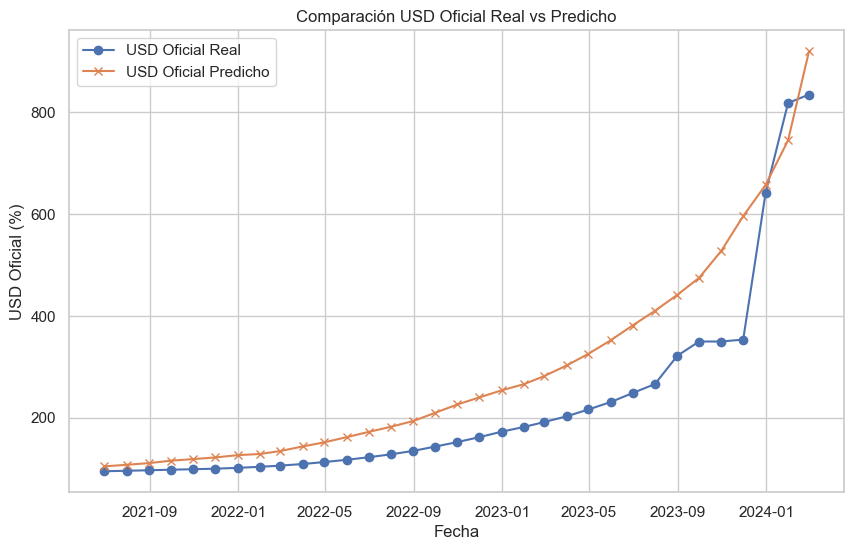

In [155]:
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label='USD Oficial Real', marker='o')
plt.plot(y_test.index, y_pred, label='USD Oficial Predicho', marker='x')
plt.title('Comparación USD Oficial Real vs Predicho')
plt.xlabel('Fecha')
plt.ylabel('USD Oficial (%)')
plt.legend()
plt.grid(True)
plt.show()

RMSE: 86.124
MAE: 69.272
R²: 0.794

Coeficientes del modelo Lasso:
inflacion                 0.589843
base_monetaria           -0.000005
cer                       3.889107
tasa_depositos_30_dias    0.059024
dtype: float64


c:\Users\primo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


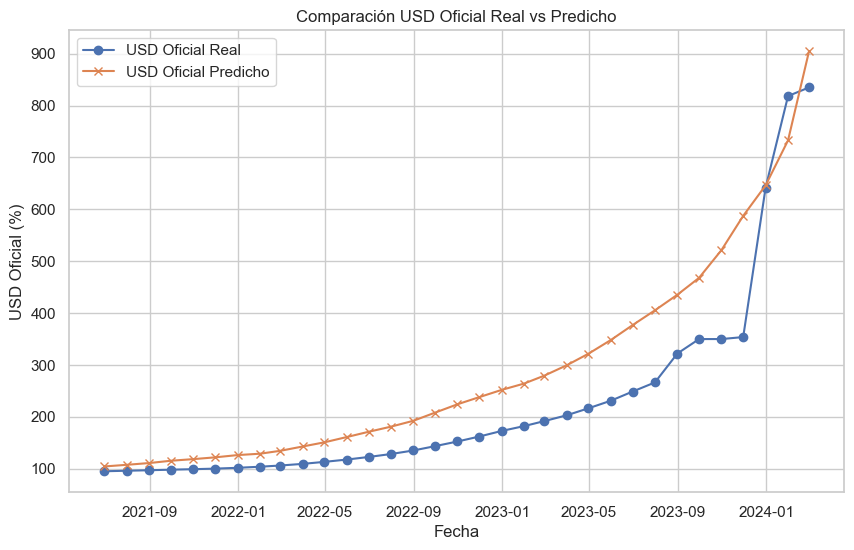

In [156]:
from sklearn.linear_model import Lasso

# Entrenar modelo Lasso
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train, y_train)

# Predicciones
y_pred = lasso.predict(X_test)

# Métricas
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"R²: {r2:.3f}")

# Coeficientes para ver qué eliminó
coeficientes = pd.Series(lasso.coef_, index=features)
print("\nCoeficientes del modelo Lasso:")
print(coeficientes)

# Visualizar predicciones vs reales
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label='USD Oficial Real', marker='o')
plt.plot(y_test.index, y_pred, label='USD Oficial Predicho', marker='x')
plt.title('Comparación USD Oficial Real vs Predicho')
plt.xlabel('Fecha')
plt.ylabel('USD Oficial (%)')
plt.legend()
plt.grid(True)
plt.show()



In [157]:
from sklearn.model_selection import cross_val_score, KFold

# Definir el cross-validator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Modelo lineal original
scores_model = cross_val_score(model, X_scaled, y, cv=cv, scoring='r2')
print("Modelo Lineal - R² por fold:")
print(scores_model)
print(f"Promedio: {scores_model.mean():.3f}, Desvío: {scores_model.std():.3f}\n")

# Modelo Lasso
scores_lasso = cross_val_score(lasso, X_scaled, y, cv=cv, scoring='r2')
print("Modelo Lasso - R² por fold:")
print(scores_lasso)
print(f"Promedio: {scores_lasso.mean():.3f}, Desvío: {scores_lasso.std():.3f}")


Modelo Lineal - R² por fold:
[0.91517571 0.88116738 0.95348551 0.95709211 0.98474117]
Promedio: 0.938, Desvío: 0.036

Modelo Lasso - R² por fold:
[0.91617257 0.8813314  0.9526366  0.95744915 0.98357529]
Promedio: 0.938, Desvío: 0.036
